In [1]:
# establish a connection with coingGecko API and fetch live prices for BTC and Ethereum

#fetch the top 10 cryptos by market cap
#fetch the top 10 cryptos by volume in last 24 hours

#fetch  historical crypto prices for BTC and Ethereum
# get live crypto prices for the top 5 crypto currencies

#calculate teh volume, volatility, market cap of various coins and pick the top 5 + 5 other outliers above a certain market cap
# fetch last 3 months historic data for ehteremum 
# charts for the above

# run a simple moving average trading algo on ethereum on last 3 months data
#calcualte the returns of the above strategy
#compare it with overall returns that ETH would have given anyways 


# these are for later 
# repeat the above for 5 years of daily data 
# repeat the above for BTC
# moudlarise the above and run on 3 more currencies: possibly MATIC, RIPPLE, Algorand, etc. 

# for much later
# visualise the strategy on a chart 

CoinGecko API docs are here https://www.coingecko.com/en/api/documentation

- Connect to pycoingecko, pandas and other libs needed
- I have created a vritual environment for this project
- I have also played around in postman in the coingecko collection to see how the API behaves
- I have notes on pandas in the notebook as well as in onenote under cryptotrading project under python and data analysis- so be sure to check both the notes and links directly in the notebook as well as teh one note notes to quickly review pandas, and many other learnings 

In [2]:
import pandas as pd
import json 
import seaborn as sns

In [4]:
from pycoingecko import CoinGeckoAPI # API docs are here: https://www.coingecko.com/en/api/documentation 
cg = CoinGeckoAPI()

### Establish a connection with coingGecko API and fetch live prices for BTC and Ethereum

In [5]:
cg.get_price(ids=['bitcoin','ethereum'], vs_currencies='usd')

{'bitcoin': {'usd': 26830}, 'ethereum': {'usd': 1816.12}}

### Fetch the top 10 cryptos by market cap

In [6]:
cg.get_coins_markets(vs_currency='usd') # get market data in USD 

[{'id': 'bitcoin',
  'symbol': 'btc',
  'name': 'Bitcoin',
  'image': 'https://assets.coingecko.com/coins/images/1/large/bitcoin.png?1547033579',
  'current_price': 26832,
  'market_cap': 519983680894,
  'market_cap_rank': 1,
  'fully_diluted_valuation': 563437104064,
  'total_volume': 7280311067,
  'high_24h': 27002,
  'low_24h': 26543,
  'price_change_24h': -168.55766019151633,
  'price_change_percentage_24h': -0.62428,
  'market_cap_change_24h': -3876386594.03302,
  'market_cap_change_percentage_24h': -0.73997,
  'circulating_supply': 19380437.0,
  'total_supply': 21000000.0,
  'max_supply': 21000000.0,
  'ath': 69045,
  'ath_change_percentage': -61.14066,
  'ath_date': '2021-11-10T14:24:11.849Z',
  'atl': 67.81,
  'atl_change_percentage': 39467.51801,
  'atl_date': '2013-07-06T00:00:00.000Z',
  'roi': None,
  'last_updated': '2023-05-22T10:41:23.553Z'},
 {'id': 'ethereum',
  'symbol': 'eth',
  'name': 'Ethereum',
  'image': 'https://assets.coingecko.com/coins/images/279/large/ether

In [7]:
current_market_data = pd.DataFrame(cg.get_coins_markets(vs_currency='usd')) # get the json into a pd dataframe

In [8]:
# explore the data frame
current_market_data.shape

(100, 26)

In [11]:
current_market_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,bitcoin,ethereum,tether,binancecoin,usd-coin,ripple,cardano,staked-ether,dogecoin,matic-network
symbol,btc,eth,usdt,bnb,usdc,xrp,ada,steth,doge,matic
name,Bitcoin,Ethereum,Tether,BNB,USD Coin,XRP,Cardano,Lido Staked Ether,Dogecoin,Polygon
image,https://assets.coingecko.com/coins/images/1/la...,https://assets.coingecko.com/coins/images/279/...,https://assets.coingecko.com/coins/images/325/...,https://assets.coingecko.com/coins/images/825/...,https://assets.coingecko.com/coins/images/6319...,https://assets.coingecko.com/coins/images/44/l...,https://assets.coingecko.com/coins/images/975/...,https://assets.coingecko.com/coins/images/1344...,https://assets.coingecko.com/coins/images/5/la...,https://assets.coingecko.com/coins/images/4713...
current_price,26829.0,1817.03,0.999957,308.83,0.999965,0.463045,0.369381,1815.27,0.073829,0.86723
market_cap,519983680894,218460336377,82936932024,48742687423,29518729655,24006288508,12932394148,11802633665,10269423383,8017618968
market_cap_rank,1,2,3,4,5,6,7,8,9,10
fully_diluted_valuation,563437104064.0,218460336377.0,82936932024.0,61744044413.0,29518729655.0,46278830828.0,16606003445.0,11803870052.0,NaN,8640169937.0
total_volume,7655369851.0,4595028523.0,11298833919.0,313406440.0,2714263659.0,940903358.0,195404701.0,13407491.0,272710266.0,160940257.0
high_24h,27002.0,1819.29,1.007,310.84,1.003,0.468501,0.37242,1819.42,0.073856,0.875644


In [ ]:
#columns we are interested in 
#"symbol", "name","current_price","market_cap","total_volume", "ath","ath_change_percentage"
## what is volume? how to read candlestick chart? what are top indicatros that traders use to predict direction/momentum?

In [12]:
current_market_data.columns

Index(['id', 'symbol', 'name', 'image', 'current_price', 'market_cap',
       'market_cap_rank', 'fully_diluted_valuation', 'total_volume',
       'high_24h', 'low_24h', 'price_change_24h',
       'price_change_percentage_24h', 'market_cap_change_24h',
       'market_cap_change_percentage_24h', 'circulating_supply',
       'total_supply', 'max_supply', 'ath', 'ath_change_percentage',
       'ath_date', 'atl', 'atl_change_percentage', 'atl_date', 'roi',
       'last_updated'],
      dtype='object')

In [13]:
current_market_data.dtypes

id                                   object
symbol                               object
name                                 object
image                                object
current_price                       float64
market_cap                            int64
market_cap_rank                       int64
fully_diluted_valuation             float64
total_volume                        float64
high_24h                            float64
low_24h                             float64
price_change_24h                    float64
price_change_percentage_24h         float64
market_cap_change_24h               float64
market_cap_change_percentage_24h    float64
circulating_supply                  float64
total_supply                        float64
max_supply                          float64
ath                                 float64
ath_change_percentage               float64
ath_date                             object
atl                                 float64
atl_change_percentage           

In [14]:
current_market_data.describe()

,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,atl,atl_change_percentage
count,1.000000e+02,1.000000e+02,100.000000,7.700000e+01,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000,1.000000e+02,100.000000,1.000000e+02,9.300000e+01,5.800000e+01,100.000000,100.000000,1.000000e+02,1.000000e+02
mean,6.520530e+02,1.109244e+10,50.500000,2.922931e+10,3.416662e+08,6.561443e+02,6.451466e+02,-3.675867,-0.638386,-4.976226e+07,-0.719748,1.987476e+13,2.623031e+13,2.471025e+13,1769.903319,-73.299071,7.791997e+01,1.813150e+05
std,3.784571e+03,5.662683e+10,29.011492,1.315840e+11,1.443598e+09,3.809766e+03,3.743978e+03,25.349983,1.902757,3.948192e+08,1.972874,1.185103e+14,1.508513e+14,1.403072e+14,9838.832519,26.355997,3.809019e+02,1.586073e+06
min,5.998010e-07,4.366183e+08,1.000000,4.705554e+08,4.065800e+02,6.038130e-07,5.960750e-07,-186.770764,-6.888280,-3.876387e+09,-7.176810,1.555487e+05,1.555487e+05,1.555487e+05,0.000003,-99.999930,5.636600e-11,1.770550e+00
25%,4.683903e-01,6.200479e+08,25.750000,9.402041e+08,1.002613e+07,4.837657e-01,4.643030e-01,-0.054117,-1.535122,-2.513590e+07,-1.698765,1.191174e+08,1.579002e+08,2.009951e+08,1.680000,-92.434453,2.765793e-02,7.385516e+01
50%,1.071000e+00,9.400961e+08,50.500000,1.853812e+09,3.162288e+07,1.112500e+00,1.047500e+00,-0.002498,-0.612035,-7.362587e+06,-0.649640,8.918995e+08,1.004141e+09,1.002071e+09,9.120000,-85.005750,3.642655e-01,4.055624e+02
75%,9.917500e+00,2.698478e+09,75.250000,7.053689e+09,9.272314e+07,9.995000e+00,9.390000e+00,0.000517,0.130038,1.072793e+06,0.062172,4.837438e+09,9.610239e+09,9.902560e+09,103.107500,-62.304860,1.024750e+00,4.526022e+03
max,2.686800e+04,5.199837e+11,100.000000,1.000452e+12,1.129883e+10,2.705400e+04,2.657700e+04,4.320000,7.849900,5.272339e+08,8.078420,9.514217e+14,9.999909e+14,9.900000e+14,70643.000000,-4.259220,3.139170e+03,1.585006e+07


In [15]:
current_market_data.sort_values(by="market_cap", ascending=False)[0:10] # grab the top 10 cyptos by market cap

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,26829.000000,519983680894,1,5.634371e+11,7.655370e+09,27002.000000,...,2.100000e+07,2.100000e+07,69045.000000,-61.14066,2021-11-10T14:24:11.849Z,67.810000,39467.51801,2013-07-06T00:00:00.000Z,None,2023-05-22T10:46:52.111Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1817.030000,218460336377,2,2.184603e+11,4.595029e+09,1819.290000,...,1.202694e+08,NaN,4878.260000,-62.76647,2021-11-10T14:24:19.604Z,0.432979,419400.56965,2015-10-20T00:00:00.000Z,"{'times': 89.54614802920622, 'currency': 'btc'...",2023-05-22T10:46:48.565Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.999957,82936932024,3,8.293693e+10,1.129883e+10,1.007000,...,8.291908e+10,NaN,1.320000,-24.40338,2018-07-24T00:00:00.000Z,0.572521,74.70369,2015-03-02T00:00:00.000Z,None,2023-05-22T10:45:00.361Z
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,308.830000,48742687423,4,6.174404e+10,3.134064e+08,310.840000,...,1.579002e+08,2.000000e+08,686.310000,-55.01716,2021-05-10T07:24:17.097Z,0.039818,775234.19527,2017-10-19T00:00:00.000Z,None,2023-05-22T10:46:55.277Z
4,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,0.999965,29518729655,5,2.951873e+10,2.714264e+09,1.003000,...,2.953118e+10,NaN,1.170000,-14.77493,2019-05-08T00:40:28.300Z,0.877647,13.87723,2023-03-11T08:02:13.981Z,None,2023-05-22T10:46:56.163Z
5,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.463045,24006288508,6,4.627883e+10,9.409034e+08,0.468501,...,9.998893e+10,1.000000e+11,3.400000,-86.38219,2018-01-07T00:00:00.000Z,0.002686,17128.55269,2014-05-22T00:00:00.000Z,None,2023-05-22T10:46:54.365Z
6,cardano,ada,Cardano,https://assets.coingecko.com/coins/images/975/...,0.369381,12932394148,7,1.660600e+10,1.954047e+08,0.372420,...,4.500000e+10,4.500000e+10,3.090000,-88.04558,2021-09-02T06:00:10.474Z,0.019253,1816.72605,2020-03-13T02:22:55.044Z,None,2023-05-22T10:46:52.987Z
7,staked-ether,steth,Lido Staked Ether,https://assets.coingecko.com/coins/images/1344...,1815.270000,11802633665,8,1.180387e+10,1.340749e+07,1819.420000,...,6.505081e+06,6.505081e+06,4829.570000,-62.42069,2021-11-10T14:40:47.256Z,482.900000,275.84050,2020-12-22T04:08:21.854Z,None,2023-05-22T10:45:33.417Z
8,dogecoin,doge,Dogecoin,https://assets.coingecko.com/coins/images/5/la...,0.073829,10269423383,9,NaN,2.727103e+08,0.073856,...,NaN,NaN,0.731578,-89.93955,2021-05-08T05:08:23.458Z,0.000087,84591.44030,2015-05-06T00:00:00.000Z,None,2023-05-22T10:46:56.992Z
9,matic-network,matic,Polygon,https://assets.coingecko.com/coins/images/4713...,0.867230,8017618968,10,8.640170e+09,1.609403e+08,0.875644,...,1.000000e+10,1.000000e+10,2.920000,-70.36737,2021-12-27T02:08:34.307Z,0.003144,27388.27355,2019-05-10T00:00:00.000Z,"{'times': 328.74524870966667, 'currency': 'usd...",2023-05-22T10:46:55.639Z


In [16]:
top_crypto_mcap = current_market_data.sort_values(by="market_cap", ascending=False).loc[0:10,["symbol", "name","current_price","market_cap","total_volume", "ath","ath_change_percentage"]] # grab the top 5 cyptos by market cap
top_crypto_mcap # TOP 10 CRYTPOS BY MARKET CAP

,symbol,name,current_price,market_cap,total_volume,ath,ath_change_percentage
0,btc,Bitcoin,26829.000000,519983680894,7.655370e+09,69045.000000,-61.14066
1,eth,Ethereum,1817.030000,218460336377,4.595029e+09,4878.260000,-62.76647
2,usdt,Tether,0.999957,82936932024,1.129883e+10,1.320000,-24.40338
3,bnb,BNB,308.830000,48742687423,3.134064e+08,686.310000,-55.01716
4,usdc,USD Coin,0.999965,29518729655,2.714264e+09,1.170000,-14.77493
5,xrp,XRP,0.463045,24006288508,9.409034e+08,3.400000,-86.38219
6,ada,Cardano,0.369381,12932394148,1.954047e+08,3.090000,-88.04558
7,steth,Lido Staked Ether,1815.270000,11802633665,1.340749e+07,4829.570000,-62.42069
8,doge,Dogecoin,0.073829,10269423383,2.727103e+08,0.731578,-89.93955
9,matic,Polygon,0.867230,8017618968,1.609403e+08,2.920000,-70.36737


### Fetch the top 10 cryptos by volume traded last 24 hours 

In [17]:
top_crypto_vol = current_market_data.sort_values(by="total_volume", ascending=False).reset_index(drop=True).loc[0:10,["symbol", "name","current_price","market_cap","total_volume", "ath","ath_change_percentage"]]


In [18]:
top_crypto_vol  # TOP CRYPTOS BY VOL TRADED IN LAST 24 HOURS 

,symbol,name,current_price,market_cap,total_volume,ath,ath_change_percentage
0,usdt,Tether,0.999957,82936932024,1.129883e+10,1.320000,-24.40338
1,btc,Bitcoin,26829.000000,519983680894,7.655370e+09,69045.000000,-61.14066
2,eth,Ethereum,1817.030000,218460336377,4.595029e+09,4878.260000,-62.76647
3,usdc,USD Coin,0.999965,29518729655,2.714264e+09,1.170000,-14.77493
4,busd,Binance USD,0.999737,5501308101,1.000790e+09,1.150000,-13.36952
5,xrp,XRP,0.463045,24006288508,9.409034e+08,3.400000,-86.38219
6,trx,TRON,0.078055,7053684183,6.791195e+08,0.231673,-66.29487
7,ltc,Litecoin,91.480000,6669171698,4.488441e+08,410.260000,-77.72491
8,bnb,BNB,308.830000,48742687423,3.134064e+08,686.310000,-55.01716
9,sol,Solana,19.900000,7879525056,2.998683e+08,259.960000,-92.34760


### Fetch  historical crypto prices for BTC and Ethereum


In [22]:
# GETTING BTC HISToRIcAL PRICES

In [27]:
btc_historical_prices_json= cg.get_coin_market_chart_by_id(id="bitcoin", vs_currency="usd",days="3500", interval="daily")

In [28]:
btc_historical_prices_json

{'prices': [[1382400000000, 193.45],
  [1382486400000, 206.78],
  [1382572800000, 198.8],
  [1382659200000, 172.48],
  [1382745600000, 178.96],
  [1382832000000, 189.83],
  [1382918400000, 198.55],
  [1383004800000, 204.39],
  [1383091200000, 204.2],
  [1383177600000, 203.88],
  [1383264000000, 205.26],
  [1383350400000, 206.89],
  [1383436800000, 212.45],
  [1383523200000, 226.28],
  [1383609600000, 230.63],
  [1383696000000, 260.85],
  [1383782400000, 295.63],
  [1383868800000, 332.02],
  [1383955200000, 358.0],
  [1384041600000, 313.0],
  [1384128000000, 340.55],
  [1384214400000, 355.48],
  [1384300800000, 404.17],
  [1384387200000, 408.84],
  [1384473600000, 424.16],
  [1384560000000, 437.41],
  [1384646400000, 488.36],
  [1384732800000, 580.87],
  [1384819200000, 614.4],
  [1384905600000, 565.34],
  [1384992000000, 675.06],
  [1385078400000, 731.15],
  [1385164800000, 819.31],
  [1385251200000, 764.43],
  [1385337600000, 793.07],
  [1385424000000, 832.93],
  [1385510400000, 914.1

AttributeError: 'dict' object has no attribute 'shape'

In [30]:
btc_historical_prices=pd.DataFrame(btc_historical_prices_json['prices'], columns =['date','price']).merge(
    pd.DataFrame(btc_historical_prices_json['market_caps'], columns =['date','market_cap']), on="date").merge(
    pd.DataFrame(btc_historical_prices_json['total_volumes'], columns =['date','volume']), on="date")

In [31]:
btc_historical_prices

,date,price,market_cap,volume
0,1382400000000,193.450000,2.298994e+09,0.000000e+00
1,1382486400000,206.780000,2.458506e+09,0.000000e+00
2,1382572800000,198.800000,2.364666e+09,0.000000e+00
3,1382659200000,172.480000,2.052637e+09,0.000000e+00
4,1382745600000,178.960000,2.130644e+09,0.000000e+00
...,...,...,...,...
3495,1684454400000,26842.952495,5.205449e+11,1.259949e+10
3496,1684540800000,26884.371060,5.211536e+11,1.155914e+10
3497,1684627200000,27093.791101,5.250400e+11,3.882362e+09
3498,1684713600000,26773.830244,5.191714e+11,8.125826e+09


In [32]:
btc_historical_prices['coin']=["btc"]*len(btc_historical_prices.index)

In [33]:
btc_historical_prices

,date,price,market_cap,volume,coin
0,1382400000000,193.450000,2.298994e+09,0.000000e+00,btc
1,1382486400000,206.780000,2.458506e+09,0.000000e+00,btc
2,1382572800000,198.800000,2.364666e+09,0.000000e+00,btc
3,1382659200000,172.480000,2.052637e+09,0.000000e+00,btc
4,1382745600000,178.960000,2.130644e+09,0.000000e+00,btc
...,...,...,...,...,...
3495,1684454400000,26842.952495,5.205449e+11,1.259949e+10,btc
3496,1684540800000,26884.371060,5.211536e+11,1.155914e+10,btc
3497,1684627200000,27093.791101,5.250400e+11,3.882362e+09,btc
3498,1684713600000,26773.830244,5.191714e+11,8.125826e+09,btc


In [34]:
eth_historical_prices_json= cg.get_coin_market_chart_by_id(id="ethereum", vs_currency="usd",days="3500", interval="daily")

In [35]:
eth_historical_prices_json

{'prices': [[1438905600000, 2.83162],
  [1438992000000, 1.33075],
  [1439164800000, 0.6875857090838133],
  [1439251200000, 1.067378879429946],
  [1439337600000, 1.256613175101658],
  [1439424000000, 1.825395446319752],
  [1439510400000, 1.825974891355639],
  [1439596800000, 1.670949668937766],
  [1439683200000, 1.476607254205028],
  [1439769600000, 1.20387143115441],
  [1439856000000, 1.281393051659975],
  [1439942400000, 1.252738651679077],
  [1440028800000, 1.484195074171873],
  [1440115200000, 1.40631477379752],
  [1440201600000, 1.380721536476638],
  [1440288000000, 1.355182100454404],
  [1440374400000, 1.24657168269902],
  [1440460800000, 1.160828327907264],
  [1440547200000, 1.119639156482987],
  [1440633600000, 1.133690694008804],
  [1440720000000, 1.188895698722608],
  [1440806400000, 1.174343905252208],
  [1440892800000, 1.322350879918967],
  [1440979200000, 1.353368417391325],
  [1441065600000, 1.350786688734447],
  [1441152000000, 1.278810765308764],
  [1441238400000, 1.2627

In [36]:
eth_historical_prices=pd.DataFrame(eth_historical_prices_json['prices'], columns =['date','price']).merge(
    pd.DataFrame(eth_historical_prices_json['market_caps'], columns =['date','market_cap']), on="date").merge(
    pd.DataFrame(eth_historical_prices_json['total_volumes'], columns =['date','volume']), on="date")

In [37]:
eth_historical_prices

,date,price,market_cap,volume
0,1438905600000,2.831620,0.000000e+00,9.062200e+04
1,1438992000000,1.330750,8.033948e+07,3.680700e+05
2,1439164800000,0.687586,4.155631e+07,4.004641e+05
3,1439251200000,1.067379,6.453901e+07,1.518998e+06
4,1439337600000,1.256613,7.601326e+07,2.073893e+06
...,...,...,...,...
2841,1684454400000,1802.390955,2.170788e+11,6.170213e+09
2842,1684540800000,1812.131704,2.180838e+11,5.092669e+09
2843,1684627200000,1818.969530,2.187702e+11,3.117917e+09
2844,1684713600000,1804.929067,2.173023e+11,3.835867e+09


In [38]:
eth_historical_prices['coin']=["eth"]*len(eth_historical_prices.index)

In [39]:
eth_historical_prices

,date,price,market_cap,volume,coin
0,1438905600000,2.831620,0.000000e+00,9.062200e+04,eth
1,1438992000000,1.330750,8.033948e+07,3.680700e+05,eth
2,1439164800000,0.687586,4.155631e+07,4.004641e+05,eth
3,1439251200000,1.067379,6.453901e+07,1.518998e+06,eth
4,1439337600000,1.256613,7.601326e+07,2.073893e+06,eth
...,...,...,...,...,...
2841,1684454400000,1802.390955,2.170788e+11,6.170213e+09,eth
2842,1684540800000,1812.131704,2.180838e+11,5.092669e+09,eth
2843,1684627200000,1818.969530,2.187702e+11,3.117917e+09,eth
2844,1684713600000,1804.929067,2.173023e+11,3.835867e+09,eth


In [ ]:
# COMBINING THE PRICE DATA

In [40]:
# appendix the 2 price data frames source: https://pandas.pydata.org/docs/user_guide/merging.html
# btc_eth_historical_prices = pd.concat([btc_historical_prices,eth_historical_prices]).reset_index(drop=True)
#DECIDED NOT TO USE combined dataframe as little use of doing that

In [46]:
#btc_eth_historical_prices
#DECIDED NOT TO USE combined dataframe as little use of doing that
#del(btc_eth_historical_prices)

In [72]:
btc_historical_prices

,date,price,market_cap,volume,coin
0,2013-10-22 00:00:00,193.450000,2.298994e+09,0.000000e+00,btc
1,2013-10-23 00:00:00,206.780000,2.458506e+09,0.000000e+00,btc
2,2013-10-24 00:00:00,198.800000,2.364666e+09,0.000000e+00,btc
3,2013-10-25 00:00:00,172.480000,2.052637e+09,0.000000e+00,btc
4,2013-10-26 00:00:00,178.960000,2.130644e+09,0.000000e+00,btc
...,...,...,...,...,...
3495,2023-05-19 00:00:00,26842.952495,5.205449e+11,1.259949e+10,btc
3496,2023-05-20 00:00:00,26884.371060,5.211536e+11,1.155914e+10,btc
3497,2023-05-21 00:00:00,27093.791101,5.250400e+11,3.882362e+09,btc
3498,2023-05-22 00:00:00,26773.830244,5.191714e+11,8.125826e+09,btc


In [54]:
help(pd.to_datetime)

Help on function to_datetime in module pandas.core.tools.datetimes:

to_datetime(arg: 'DatetimeScalarOrArrayConvertible | DictConvertible', errors: 'DateTimeErrorChoices' = 'raise', dayfirst: 'bool' = False, yearfirst: 'bool' = False, utc: 'bool' = False, format: 'str | None' = None, exact: 'bool | lib.NoDefault' = <no_default>, unit: 'str | None' = None, infer_datetime_format: 'lib.NoDefault | bool' = <no_default>, origin: 'str' = 'unix', cache: 'bool' = True) -> 'DatetimeIndex | Series | DatetimeScalar | NaTType | None'
    Convert argument to datetime.
    
    This function converts a scalar, array-like, :class:`Series` or
    :class:`DataFrame`/dict-like to a pandas datetime object.
    
    Parameters
    ----------
    arg : int, float, str, datetime, list, tuple, 1-d array, Series, DataFrame/dict-like
        The object to convert to a datetime. If a :class:`DataFrame` is provided, the
        method expects minimally the following columns: :const:`"year"`,
        :const:`"mon

In [61]:
# convert unix ms timestamp to date from 
# https://stackoverflow.com/questions/19231871/convert-unix-time-to-readable-date-in-pandas-dataframe 
btc_historical_prices['date']=pd.to_datetime(btc_historical_prices['date'],unit='s')
eth_historical_prices['date']=pd.to_datetime(eth_historical_prices['date'],unit='s')

In [62]:
btc_historical_prices

,date,price,market_cap,volume,coin
0,2013-10-22 00:00:00,193.450000,2.298994e+09,0.000000e+00,btc
1,2013-10-23 00:00:00,206.780000,2.458506e+09,0.000000e+00,btc
2,2013-10-24 00:00:00,198.800000,2.364666e+09,0.000000e+00,btc
3,2013-10-25 00:00:00,172.480000,2.052637e+09,0.000000e+00,btc
4,2013-10-26 00:00:00,178.960000,2.130644e+09,0.000000e+00,btc
...,...,...,...,...,...
3495,2023-05-19 00:00:00,26842.952495,5.205449e+11,1.259949e+10,btc
3496,2023-05-20 00:00:00,26884.371060,5.211536e+11,1.155914e+10,btc
3497,2023-05-21 00:00:00,27093.791101,5.250400e+11,3.882362e+09,btc
3498,2023-05-22 00:00:00,26773.830244,5.191714e+11,8.125826e+09,btc


In [63]:
eth_historical_prices

,date,price,market_cap,volume,coin
0,2015-08-07 00:00:00,2.831620,0.000000e+00,9.062200e+04,eth
1,2015-08-08 00:00:00,1.330750,8.033948e+07,3.680700e+05,eth
2,2015-08-10 00:00:00,0.687586,4.155631e+07,4.004641e+05,eth
3,2015-08-11 00:00:00,1.067379,6.453901e+07,1.518998e+06,eth
4,2015-08-12 00:00:00,1.256613,7.601326e+07,2.073893e+06,eth
...,...,...,...,...,...
2841,2023-05-19 00:00:00,1802.390955,2.170788e+11,6.170213e+09,eth
2842,2023-05-20 00:00:00,1812.131704,2.180838e+11,5.092669e+09,eth
2843,2023-05-21 00:00:00,1818.969530,2.187702e+11,3.117917e+09,eth
2844,2023-05-22 00:00:00,1804.929067,2.173023e+11,3.835867e+09,eth


In [ ]:
# add 7,30,90,180 days moving average for price and volume 
# good link explaining this is here:
#https://www.geeksforgeeks.org/how-to-calculate-moving-average-in-a-pandas-dataframe/ 
# HOW do I ensure that DF is sorted on date-time? Should I make it an index? what does Index do?

In [69]:
btc_historical_prices

AttributeError: 'DataFrame' object has no attribute 'types'

In [ ]:
# I will do ETH from here on again, once done with BTC once!!! to save labour and make good progress 

In [83]:
btc_historical_prices['price_sma_7']= btc_historical_prices['price'].rolling(7).mean()
btc_historical_prices['price_sma_30']= btc_historical_prices['price'].rolling(30).mean()
btc_historical_prices['price_sma_90']= btc_historical_prices['price'].rolling(90).mean()
btc_historical_prices['price_sma_180']= btc_historical_prices['price'].rolling(180).mean()

In [84]:
btc_historical_prices

,date,price,market_cap,volume,coin,price_sma_30,price_sma_7,price_sma_90,price_sma_180
0,2013-10-22 00:00:00,193.450000,2.298994e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN
1,2013-10-23 00:00:00,206.780000,2.458506e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN
2,2013-10-24 00:00:00,198.800000,2.364666e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN
3,2013-10-25 00:00:00,172.480000,2.052637e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN
4,2013-10-26 00:00:00,178.960000,2.130644e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3495,2023-05-19 00:00:00,26842.952495,5.205449e+11,1.259949e+10,btc,28068.653822,26997.293220,26768.263210,22961.661892
3496,2023-05-20 00:00:00,26884.371060,5.211536e+11,1.155914e+10,btc,28003.692274,27011.104744,26793.169657,23020.441304
3497,2023-05-21 00:00:00,27093.791101,5.250400e+11,3.882362e+09,btc,27964.966036,27053.342577,26824.384247,23083.104947
3498,2023-05-22 00:00:00,26773.830244,5.191714e+11,8.125826e+09,btc,27947.421806,27033.631858,26846.463850,23142.006065


In [85]:
btc_historical_prices['vol_sma_7']= btc_historical_prices['volume'].rolling(7).mean()
btc_historical_prices['vol_sma_30']= btc_historical_prices['volume'].rolling(30).mean()
btc_historical_prices['vol_sma_90']= btc_historical_prices['volume'].rolling(90).mean()
btc_historical_prices['vol_sma_180']= btc_historical_prices['volume'].rolling(180).mean()

In [86]:
btc_historical_prices

,date,price,market_cap,volume,coin,price_sma_30,price_sma_7,price_sma_90,price_sma_180,vol_sma_7,vol_sma_30,vol_sma_90,vol_sma_180
0,2013-10-22 00:00:00,193.450000,2.298994e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-10-23 00:00:00,206.780000,2.458506e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-10-24 00:00:00,198.800000,2.364666e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-10-25 00:00:00,172.480000,2.052637e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-10-26 00:00:00,178.960000,2.130644e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,2023-05-19 00:00:00,26842.952495,5.205449e+11,1.259949e+10,btc,28068.653822,26997.293220,26768.263210,22961.661892,1.088848e+10,1.487672e+10,2.391251e+10,2.532171e+10
3496,2023-05-20 00:00:00,26884.371060,5.211536e+11,1.155914e+10,btc,28003.692274,27011.104744,26793.169657,23020.441304,1.123161e+10,1.445747e+10,2.376428e+10,2.529881e+10
3497,2023-05-21 00:00:00,27093.791101,5.250400e+11,3.882362e+09,btc,27964.966036,27053.342577,26824.384247,23083.104947,1.059117e+10,1.386369e+10,2.343336e+10,2.514784e+10
3498,2023-05-22 00:00:00,26773.830244,5.191714e+11,8.125826e+09,btc,27947.421806,27033.631858,26846.463850,23142.006065,1.089208e+10,1.345387e+10,2.309035e+10,2.505359e+10


In [ ]:
# add deviation from each of the averages 

In [ ]:
# quick and nice funde on doing this here:
#https://stackoverflow.com/questions/42100058/percentage-difference-between-any-two-columns-of-pandas-dataframe 

In [87]:
def perc_diff (col1, col2):
    return (col1-col2)/col2

In [103]:
btc_historical_prices['dev_price_sma_7'] = perc_diff(btc_historical_prices['price'],
                                                     btc_historical_prices['price_sma_7'])
btc_historical_prices['dev_price_sma_30'] = perc_diff(btc_historical_prices['price'],
                                                     btc_historical_prices['price_sma_30'])
btc_historical_prices['dev_price_sma_90'] = perc_diff(btc_historical_prices['price'],
                                                     btc_historical_prices['price_sma_90'])
btc_historical_prices['dev_price_sma_180'] = perc_diff(btc_historical_prices['price'],
                                                     btc_historical_prices['price_sma_180'])

In [ ]:
btc_historical_prices

In [104]:
btc_historical_prices['dev_vol_sma_7'] = perc_diff(btc_historical_prices['volume'],
                                                   btc_historical_prices['vol_sma_7'])
btc_historical_prices['dev_vol_sma_30'] = perc_diff(btc_historical_prices['volume'],
                                                     btc_historical_prices['vol_sma_30'])
btc_historical_prices['dev_vol_sma_90'] = perc_diff(btc_historical_prices['volume'],
                                                     btc_historical_prices['vol_sma_90'])
btc_historical_prices['dev_vol_sma_180'] = perc_diff(btc_historical_prices['volume'],
                                                     btc_historical_prices['vol_sma_180'])

In [105]:
btc_historical_prices

,date,price,market_cap,volume,coin,price_sma_30,price_sma_7,price_sma_90,price_sma_180,vol_sma_7,...,vol_sma_90,vol_sma_180,dev_vol_sma_7,dev_price_sma_7,dev_price_sma_30,dev_price_sma_90,dev_price_sma_180,dev_vol_sma_30,dev_vol_sma_90,dev_vol_sma_180
0,2013-10-22 00:00:00,193.450000,2.298994e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-10-23 00:00:00,206.780000,2.458506e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-10-24 00:00:00,198.800000,2.364666e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-10-25 00:00:00,172.480000,2.052637e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-10-26 00:00:00,178.960000,2.130644e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,2023-05-19 00:00:00,26842.952495,5.205449e+11,1.259949e+10,btc,28068.653822,26997.293220,26768.263210,22961.661892,1.088848e+10,...,2.391251e+10,2.532171e+10,0.157139,-0.005717,-0.043668,0.002790,0.169034,-0.153074,-0.473101,-0.502424
3496,2023-05-20 00:00:00,26884.371060,5.211536e+11,1.155914e+10,btc,28003.692274,27011.104744,26793.169657,23020.441304,1.123161e+10,...,2.376428e+10,2.529881e+10,0.029162,-0.004692,-0.039970,0.003404,0.167848,-0.200473,-0.513592,-0.543096
3497,2023-05-21 00:00:00,27093.791101,5.250400e+11,3.882362e+09,btc,27964.966036,27053.342577,26824.384247,23083.104947,1.059117e+10,...,2.343336e+10,2.514784e+10,-0.633434,0.001495,-0.031152,0.010043,0.173750,-0.719962,-0.834323,-0.845618
3498,2023-05-22 00:00:00,26773.830244,5.191714e+11,8.125826e+09,btc,27947.421806,27033.631858,26846.463850,23142.006065,1.089208e+10,...,2.309035e+10,2.505359e+10,-0.253969,-0.009610,-0.041993,-0.002706,0.156936,-0.396023,-0.648086,-0.675662


In [102]:
# had used this for testing if the above worked properly or not!
#btc_historical_prices[['date','price','volume','vol_sma_7','dev_vol_sma_7']].tail(30)
#btc_historical_prices[['date','price','price_sma_7','dev_price_sma_7']].tail(30)

,date,price,price_sma_7,dev_price_sma_7
3470,2023-04-24 00:00:00,27606.578348,28527.219412,-0.032272
3471,2023-04-25 00:00:00,27511.635682,28247.815963,-0.026061
3472,2023-04-26 00:00:00,28351.218248,27960.003689,0.013992
3473,2023-04-27 00:00:00,28352.191321,27891.285663,0.016525
3474,2023-04-28 00:00:00,29483.521705,28066.706157,0.050480
3475,2023-04-29 00:00:00,29339.994998,28358.111566,0.034624
3476,2023-04-30 00:00:00,29217.944047,28551.869193,0.023329
3477,2023-05-01 00:00:00,29362.056214,28802.651745,0.019422
3478,2023-05-02 00:00:00,28125.501156,28890.346813,-0.026474
3479,2023-05-03 00:00:00,28654.390133,28933.657082,-0.009652


In [106]:
sns.set_theme(style="white")

In [107]:
# setting the plot to be bigger. source: https://www.delftstack.com/howto/seaborn/size-of-seaborn-plot/
sns.set(rc={'figure.figsize':(15,8)})

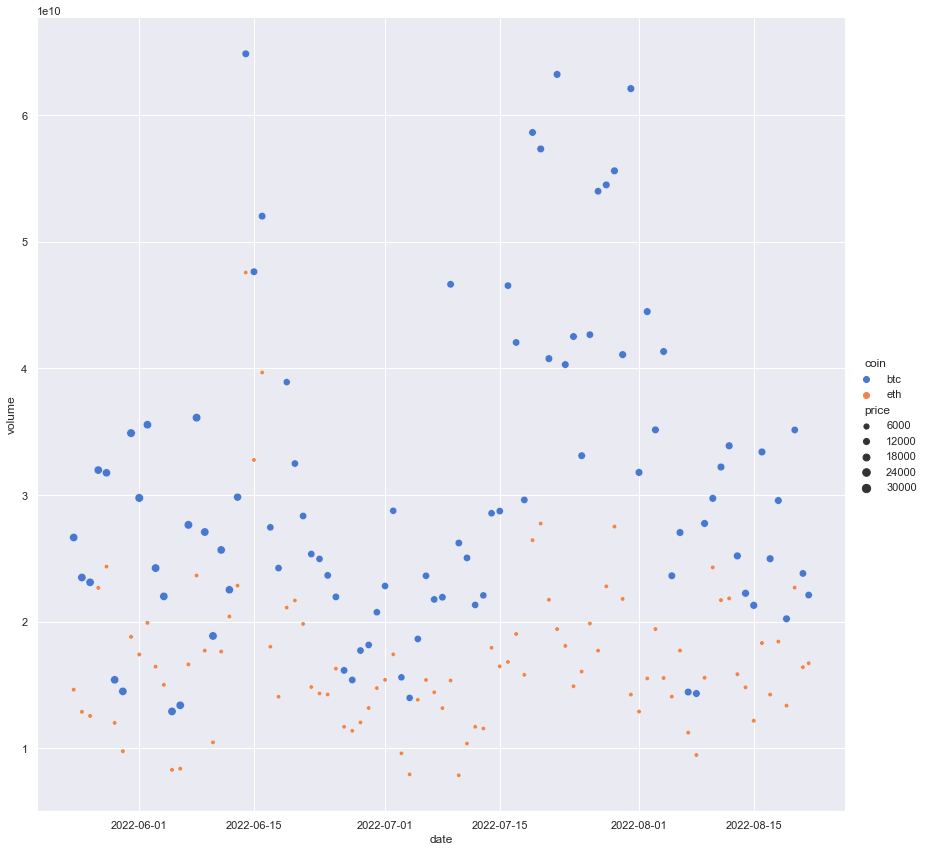

In [207]:
#BUBBLE PLOT (OLD) ### OLDER Plot, not using currently ###
# from https://seaborn.pydata.org/examples/scatter_bubbles.html
##sns.relplot(x='date',y='volume',hue='coin',size='price',palette='muted',height=12, data=btc_eth_historical_prices)

In [ ]:

#LINE PLOT

In [ ]:
# signle line

<Axes: xlabel='date', ylabel='price'>

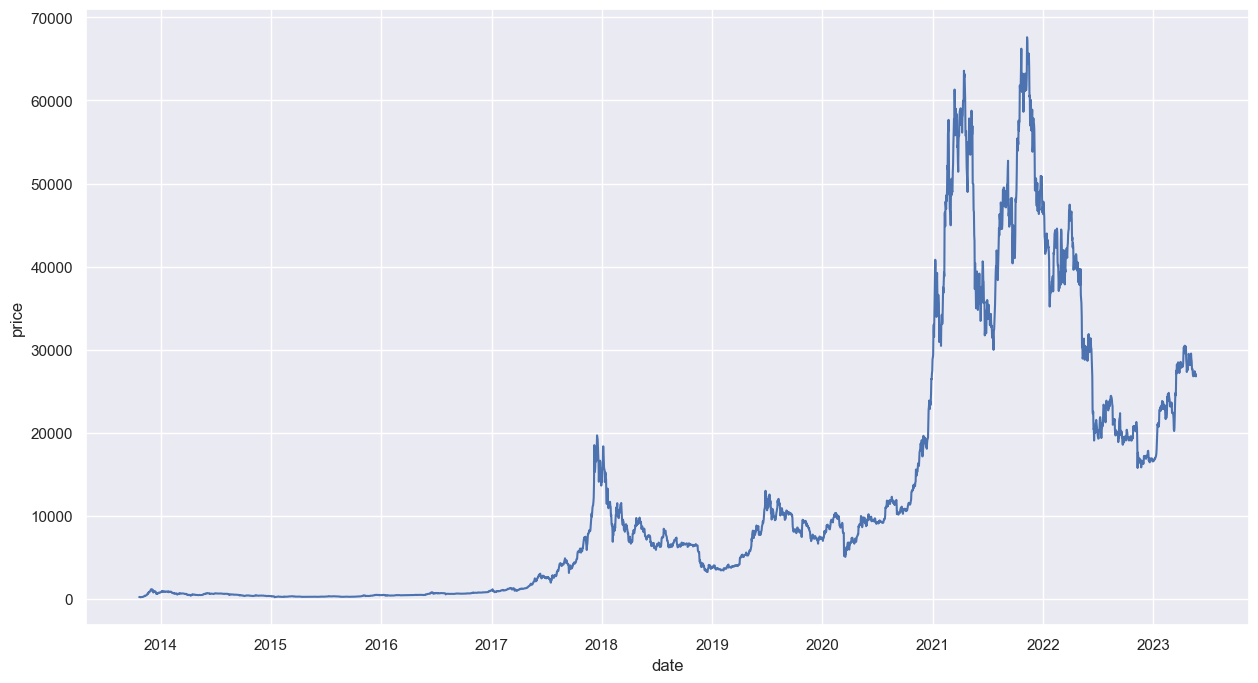

In [110]:
sns.lineplot(x='date',y='price', data=btc_historical_prices)

In [ ]:
# Multiple lines on the same plot, very useful link here: 
# https://www.statology.org/seaborn-plot-multiple-lines/

In [112]:
btc_historical_prices.dtypes

date                 datetime64[ns]
price                       float64
market_cap                  float64
volume                      float64
coin                         object
price_sma_30                float64
price_sma_7                 float64
price_sma_90                float64
price_sma_180               float64
vol_sma_7                   float64
vol_sma_30                  float64
vol_sma_90                  float64
vol_sma_180                 float64
dev_vol_sma_7               float64
dev_price_sma_7             float64
dev_price_sma_30            float64
dev_price_sma_90            float64
dev_price_sma_180           float64
dev_vol_sma_30              float64
dev_vol_sma_90              float64
dev_vol_sma_180             float64
dtype: object

<Axes: >

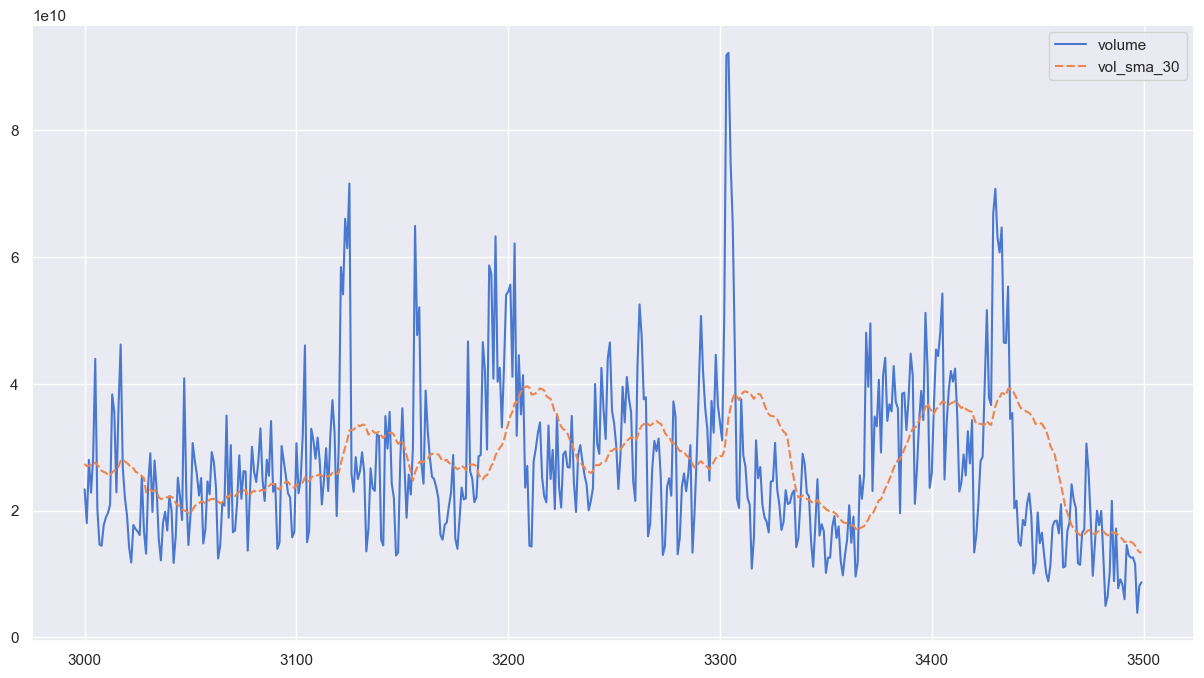

In [126]:
sns.lineplot(data=btc_historical_prices[['date','volume','vol_sma_30']].tail(500),palette='muted')

<Axes: >

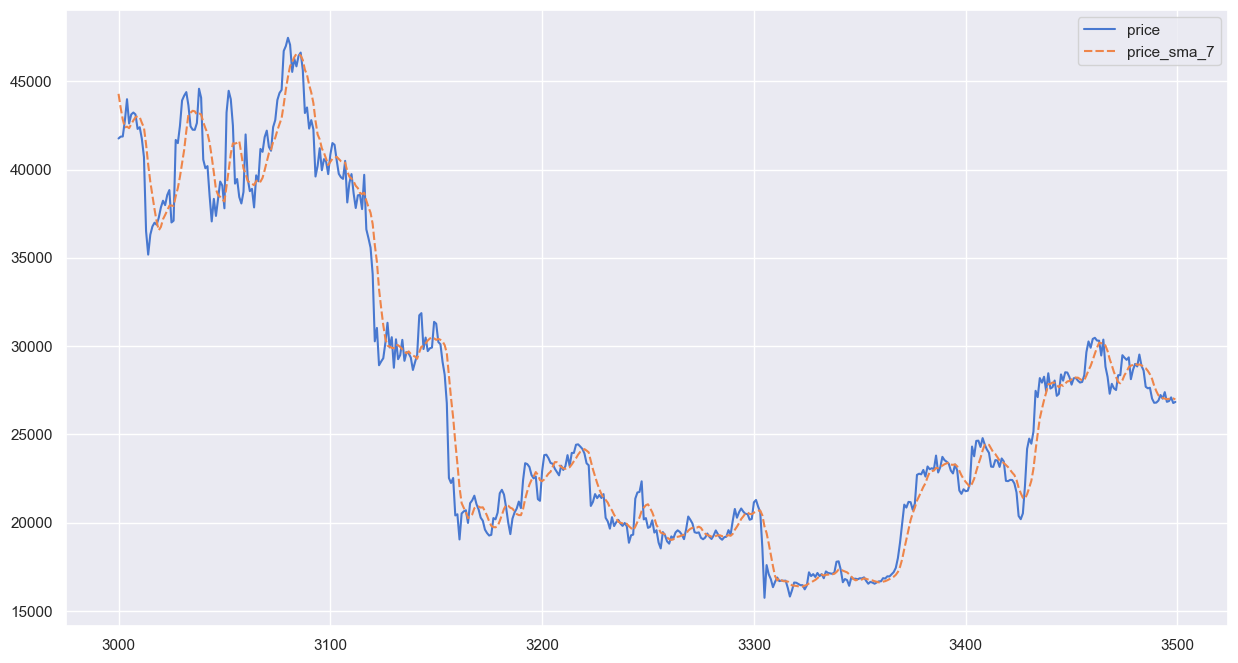

In [123]:
sns.lineplot(data=btc_historical_prices[['date','price','price_sma_7']].tail(500),palette='muted')

<Axes: >

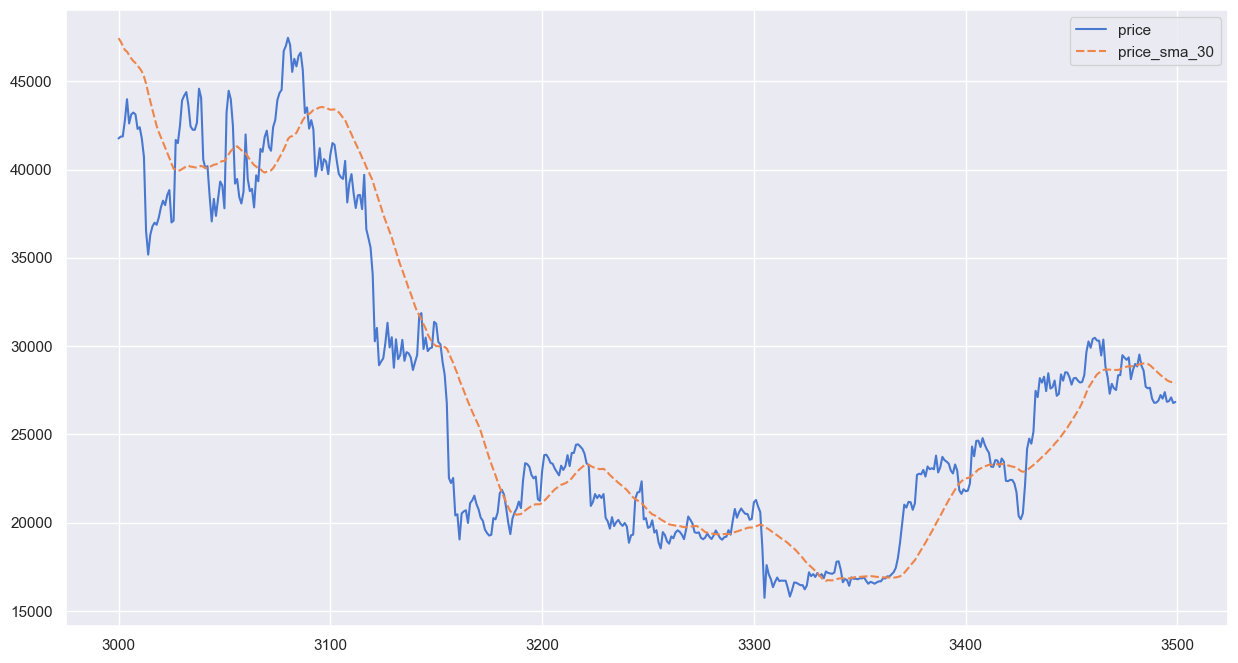

In [121]:
sns.lineplot(data=btc_historical_prices[['date','price','price_sma_30']].tail(500),palette='muted')

<Axes: >

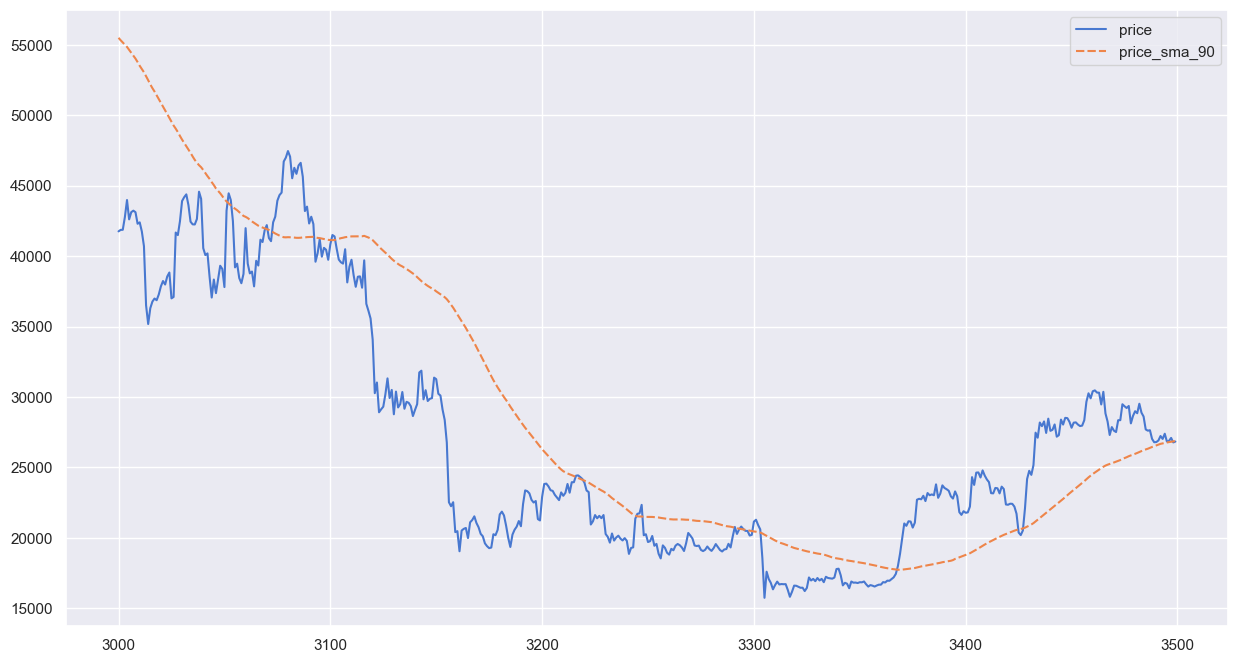

In [122]:
sns.lineplot(data=btc_historical_prices[['date','price','price_sma_90']].tail(500),palette='muted')

<AxesSubplot:xlabel='date', ylabel='price'>

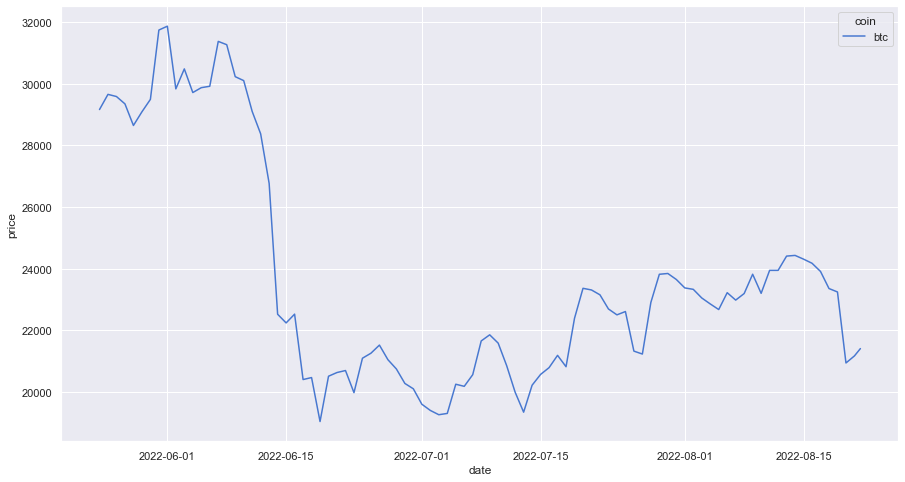

In [218]:
# filtering only on btc data source: https://towardsdatascience.com/8-ways-to-filter-pandas-dataframes-d34ba585c1b8 
sns.lineplot(x='date',y='price',hue='coin',palette='muted'
             , data=btc_eth_historical_prices[btc_eth_historical_prices.coin=='btc'])

<AxesSubplot:xlabel='date', ylabel='price'>

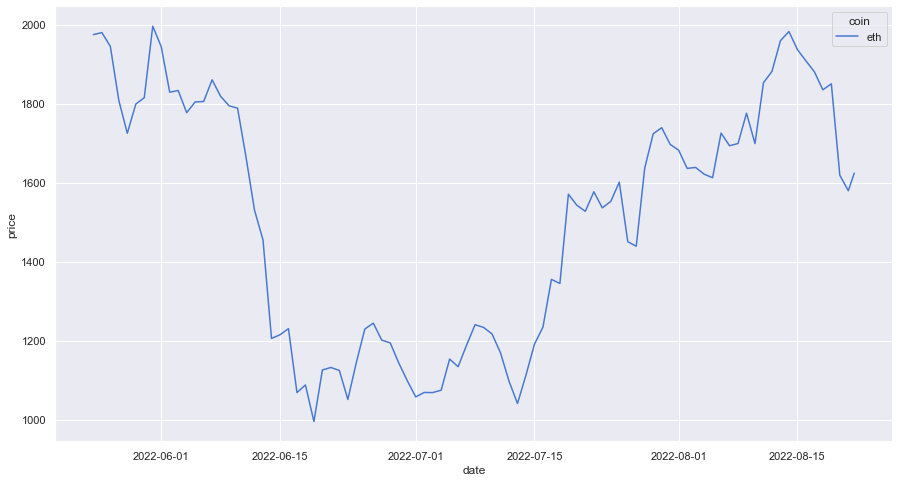

In [219]:
sns.lineplot(x='date',y='price',hue='coin',palette='muted'
             , data=btc_eth_historical_prices[btc_eth_historical_prices.coin=='eth'])

In [ ]:
# make a wide array like before and do some ratios and plotting on 2 axes adn stuff like that 

In [ ]:
# plotting with 2 different vertical axes

In [ ]:
ax=btc_eth_historical_prices.plot(x="date",y="price")

In [ ]:
# generic function to fetch historical crypto prices into a data frame 

In [ ]:
# fetch the list of cryptos i am interested in

In [ ]:
# loop through the cryptos, fetch the prices, and aggregate in a dataframe

In [ ]:
# plot them all together 

In [115]:
# grab an element in each row, put the date from the first one in a new dataframe, 
# and grab the price from the list, convert it to float, do the same for mcap and volume, build a row and append to 
# new dataframe 

### Volume trends for top 10 crypto over last 3 months 
**Plot a graph showing line charts of top 10 crypto currencies by trading volume for each day** 
1. Grab a set of cryptos that were in teh top 10 traded in the last 3 months at any time 
2. Plot their volume traded daily 
3. Let the size of the circle represent price of the asset (we will see if this is possible )

### PLAYING AROUND WITH GRAPHING (NEHAS CODE TO BE USED AS A BASE FOR FURTHER EXPLORATION)

<AxesSubplot:xlabel='symbol'>

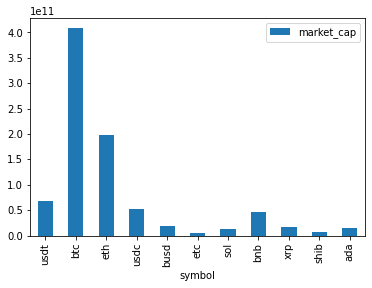

In [75]:
top_crypto_vol.plot.bar(x='symbol', y='market_cap')

<AxesSubplot:xlabel='current_price', ylabel='market_cap'>

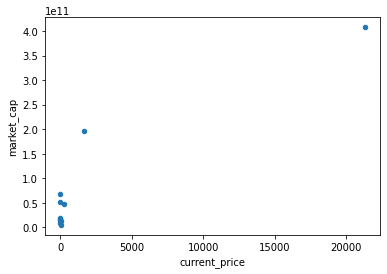

In [77]:
top_crypto_vol.plot.scatter(x='current_price', y='market_cap')

<AxesSubplot:xlabel='current_price'>

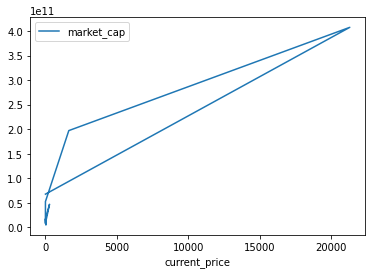

In [78]:
top_crypto_vol.plot.line(x='current_price', y='market_cap')

## Playing around with some interesting API features

### some of these would be signals for my trading algo 

### Trending on coingecko

In [19]:
cg.get_search_trending()

{'coins': [{'item': {'id': 'aptos',
    'coin_id': 26455,
    'name': 'Aptos',
    'symbol': 'APT',
    'market_cap_rank': 35,
    'thumb': 'https://assets.coingecko.com/coins/images/26455/thumb/aptos_round.png?1666839629',
    'small': 'https://assets.coingecko.com/coins/images/26455/small/aptos_round.png?1666839629',
    'large': 'https://assets.coingecko.com/coins/images/26455/large/aptos_round.png?1666839629',
    'slug': 'aptos',
    'price_btc': 0.0003038969488960325,
    'score': 0}},
  {'item': {'id': 'uniswap',
    'coin_id': 12504,
    'name': 'Uniswap',
    'symbol': 'UNI',
    'market_cap_rank': 20,
    'thumb': 'https://assets.coingecko.com/coins/images/12504/thumb/uniswap-uni.png?1600306604',
    'small': 'https://assets.coingecko.com/coins/images/12504/small/uniswap-uni.png?1600306604',
    'large': 'https://assets.coingecko.com/coins/images/12504/large/uniswap-uni.png?1600306604',
    'slug': 'uniswap',
    'price_btc': 0.00019085025783404093,
    'score': 1}},
  {'item

### Exchange volumes

In [110]:
cg.get_exchanges_list()

[{'id': 'binance',
  'name': 'Binance',
  'year_established': 2017,
  'country': 'Cayman Islands',
  'description': '',
  'url': 'https://www.binance.com/',
  'image': 'https://assets.coingecko.com/markets/images/52/small/binance.jpg?1519353250',
  'has_trading_incentive': False,
  'trust_score': 10,
  'trust_score_rank': 1,
  'trade_volume_24h_btc': 581554.7481008751,
  'trade_volume_24h_btc_normalized': 581554.7481008751},
 {'id': 'gdax',
  'name': 'Coinbase Exchange',
  'year_established': 2012,
  'country': 'United States',
  'description': '',
  'url': 'https://www.coinbase.com',
  'image': 'https://assets.coingecko.com/markets/images/23/small/Coinbase_Coin_Primary.png?1621471875',
  'has_trading_incentive': False,
  'trust_score': 10,
  'trust_score_rank': 2,
  'trade_volume_24h_btc': 84181.13762879923,
  'trade_volume_24h_btc_normalized': 84181.13762879923},
 {'id': 'ftx_spot',
  'name': 'FTX',
  'year_established': 2019,
  'country': 'Antigua and Barbuda',
  'description': '',


In [111]:
cg.get_exchanges_by_id(id="binance")

{'name': 'Binance',
 'year_established': 2017,
 'country': 'Cayman Islands',
 'description': '',
 'url': 'https://www.binance.com/',
 'image': 'https://assets.coingecko.com/markets/images/52/small/binance.jpg?1519353250',
 'facebook_url': 'https://www.facebook.com/binanceexchange',
 'reddit_url': 'https://www.reddit.com/r/binance/',
 'telegram_url': '',
 'slack_url': '',
 'other_url_1': 'https://medium.com/binanceexchange',
 'other_url_2': 'https://steemit.com/@binanceexchange',
 'twitter_handle': 'binance',
 'has_trading_incentive': False,
 'centralized': True,
 'public_notice': '',
 'alert_notice': '',
 'trust_score': 10,
 'trust_score_rank': 1,
 'trade_volume_24h_btc': 581094.768144741,
 'trade_volume_24h_btc_normalized': 581094.768144741,
 'tickers': [{'base': 'BUSD',
   'target': 'USDT',
   'market': {'name': 'Binance',
    'identifier': 'binance',
    'has_trading_incentive': False},
   'last': 1.0001,
   'volume': 336368257.2714729,
   'converted_last': {'btc': 4.679e-05, 'eth':

### Defi 

In [108]:
cg.get_global_decentralized_finance_defi()

{'defi_market_cap': '43354013868.020097141724744473',
 'eth_market_cap': '194652865884.8363110995718186812',
 'defi_to_eth_ratio': '22.2724765294079475420993784781938757475466724999218522719868576',
 'trading_volume_24h': '3169056498.53481290827945465605',
 'defi_dominance': '4.0582929426778498468257924222203980248806433861827603',
 'top_coin_name': 'Lido Staked Ether',
 'top_coin_defi_dominance': 15.560542225971979}

### Public companies holding crypto (known)

In [20]:
cg.get_companies_public_treasury_by_coin_id(coin_id = "ethereum")

{'total_holdings': 80026.1,
 'total_value_usd': 145131588.36947596,
 'market_cap_dominance': 0.07,
 'companies': [{'name': 'Coinbase',
   'symbol': 'NASDAQ: COIN',
   'country': 'US',
   'total_holdings': 48880,
   'total_entry_value_usd': 165400000,
   'total_current_value_usd': 88646660,
   'percentage_of_total_supply': 0.041},
  {'name': 'Meitu',
   'symbol': 'HKG:1357',
   'country': 'HK',
   'total_holdings': 31000,
   'total_entry_value_usd': 50500000,
   'total_current_value_usd': 56220148,
   'percentage_of_total_supply': 0.026},
  {'name': 'Mogo Inc.',
   'symbol': 'NASDAQ:MOGO',
   'country': 'CA',
   'total_holdings': 146,
   'total_entry_value_usd': 405880,
   'total_current_value_usd': 264778,
   'percentage_of_total_supply': 0.0}]}

In [21]:
cg.get_companies_public_treasury_by_coin_id(coin_id = "bitcoin")

{'total_holdings': 174374.4658,
 'total_value_usd': 4675890551.815338,
 'market_cap_dominance': 0.9,
 'companies': [{'name': 'MicroStrategy Inc.',
   'symbol': 'NASDAQ:MSTR',
   'country': 'US',
   'total_holdings': 129699,
   'total_entry_value_usd': 3975000000,
   'total_current_value_usd': 3477907880,
   'percentage_of_total_supply': 0.618},
  {'name': 'Marathon Digital Holdings',
   'symbol': 'NASDAQ:MARA',
   'country': 'US',
   'total_holdings': 10054,
   'total_entry_value_usd': 150000000,
   'total_current_value_usd': 269621725,
   'percentage_of_total_supply': 0.048},
  {'name': 'Coinbase',
   'symbol': 'NASDAQ: COIN',
   'country': 'US',
   'total_holdings': 9000,
   'total_entry_value_usd': 173700000,
   'total_current_value_usd': 241337025,
   'percentage_of_total_supply': 0.043},
  {'name': 'Square Inc.',
   'symbol': 'NASDAQ:SQ',
   'country': 'US',
   'total_holdings': 8027,
   'total_entry_value_usd': 220000000,
   'total_current_value_usd': 215245811,
   'percentage_of